In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *
import matplotlib

Using TensorFlow backend.


Initialized TensorFlow


In [24]:
def get_W(scale = 1.0, epochs = 15, N = [200, 100, 100, 100]):
    # scaling the architecture up/down
    N = [int(t * scale) for t in N]

    def get_p_arr(p):
        """ p array with failure on the first layer """
        return [0, p]  + [0] * len(N)

    # Lips. coeff
    KLips = 1.

    # activation function
    activation = 'sigmoid'

    # training the network
    exp = MNISTExperiment(N = N, p_inference = get_p_arr(0), p_train = get_p_arr(0), KLips = KLips, epochs = epochs,
                                      activation = activation, reg_type = 'l1', reg_coeff = 0.00001, do_print = 'plot',
                                      name = 'experiment_weights', seed = None, batch_size = 100)
    
    # returning the weights in the middle
    return exp.W[2]

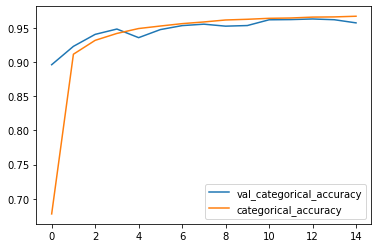

In [25]:
W = get_W()

In [26]:
np.linalg.norm(W, ord=1)

10.433845

In [3]:
# all scales of the network (up and down)
scales = np.linspace(0.5, 5, 5)

# repetitions for each scale
repetitions = 3

print('Total runs: %d' % (len(scales) * repetitions))

Total runs: 15


In [4]:
def process_scale(s):
    """ Run many repetitions for one scale """
    return [get_W(scale = s, epochs = 0) for _ in range(repetitions)]

def process_all():
    """ Random variable with all results """
    return {scale: process_scale(scale) for scale in tqdm(scales)}

In [50]:
# obtaining the results
results = process_all()


100%|██████████| 5/5 [01:36<00:00, 19.83s/it]

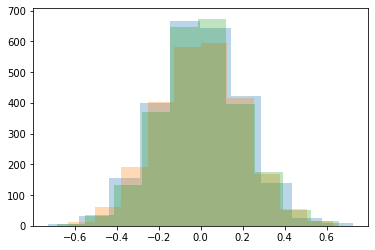

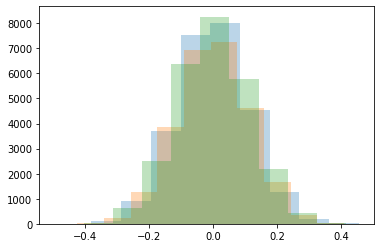

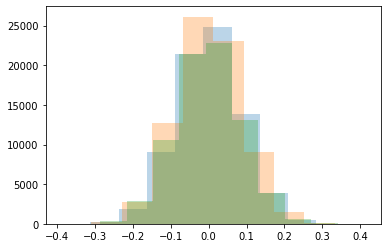

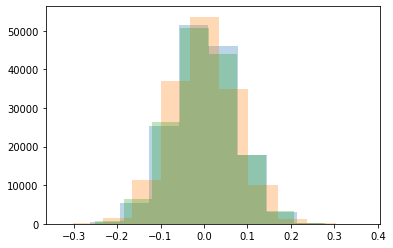

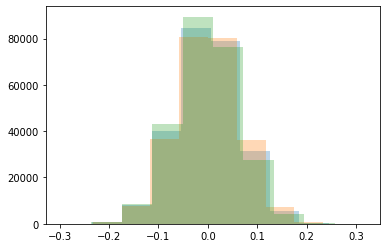

In [51]:
# untrained
for scale in scales:
    plt.figure()
    for i in range(repetitions):
        plt.hist(results[scale][i].flatten(), alpha = 0.3)
    plt.show()

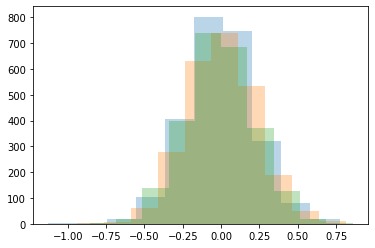

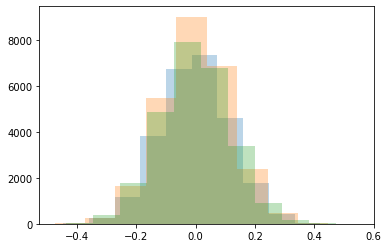

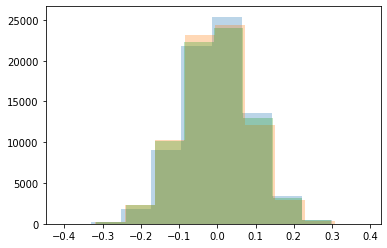

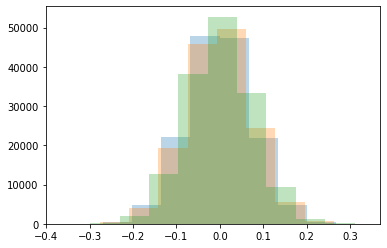

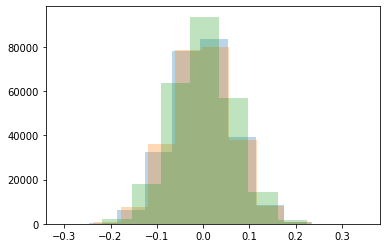

In [48]:
# trained 20 epochs
for scale in scales:
    plt.figure()
    for i in range(repetitions):
        plt.hist(results[scale][i].flatten(), alpha = 0.3)
    plt.show()

In [ ]:
# Weights become smaller as scale grows.